In [ ]:
import pandas as pd
import pandas as pd
import pickle
from helpers import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

# Calculates the performance of the minimum hitting set approach
# Takes the runtime clustering parameter k and optionally a seed for the train-test split as input
# Returns a dictionary containing default, virtual test performance on the portfolio, as well as classifier performance
def minhitsetclassifier(k : int, seed=0):

    df = pd.read_csv('../classifier/top40.csv')
    df = df.groupby('configuration')['time'].sum()
    


    

    feat = get_available_features()
    data = get_prediction_dataset(feat, "family")

    # Relabel small families to "rest"
    family_counts = data['family'].value_counts()
    families_to_replace = family_counts[family_counts < 5].index
    data['family'] = data['family'].apply(lambda x: 'rest' if x in families_to_replace else x)

    data_train, data_test = train_test_split(data, test_size=0.2, random_state=seed, stratify=data["family"])

    # Get configurations that satisfy the minimum hitting set constraint
    indeces = minhitset(data_train,k, seed=seed)
    configs = df.iloc[indeces].index.tolist()

    df = pd.read_csv('top40.csv')

    family_hashes = {}
    for family in data['family'].unique():
        family_hashes[family] = data_train[data_train['family'] == family]['hash'].tolist()


    best_configurations = {}
    for family, hashes in family_hashes.items():

        family_df = df[df['key'].isin(hashes)]
        family_df = family_df[family_df['configuration'].isin(configs)]

        config_runtime_sum = family_df.groupby('configuration')['time'].sum()

        if config_runtime_sum.nunique() == 1:
            best_config = 0
        else:
            best_config = config_runtime_sum.idxmin()

        best_configurations[family] = best_config


    reversed_best_configurations = {}
    for family, config in best_configurations.items():

        if config not in reversed_best_configurations:
            reversed_best_configurations[config] = []

        reversed_best_configurations[config].append(family)

    configs = list(reversed_best_configurations.keys())
    data_train['index']= "null"
    data_test['index'] = "null"
    for config in configs:
        for family in reversed_best_configurations[config]:
            data_train.loc[data_train['family'] == family, 'index'] = str(config)

    for config in configs:
        for family in reversed_best_configurations[config]:
            data_test.loc[data_test['family'] == family, 'index'] = str(config)


    model = RandomForestClassifier()
    model.fit(data_train[feat], data_train['index'])

    insts = data_test['hash'].tolist()
    y_pred = model.predict(data_test[feat])

    predictions_df = pd.DataFrame(list(zip(data_test["hash"], y_pred)), columns=["hash", "predicted_index"])

    default_sum = getDefault(insts)
    virtual_sum = getVirtual(insts, configs)
    eval_sum = evalConfigPredict(predictions_df)

    return {
            'Default': default_sum,
            'Virtual': virtual_sum,
            'Eval': eval_sum
        }


results = []
for k in range(11,13):
    partial = []
    for i in range(50):
        partial.append(minhitsetclassifier(k, seed=i))

    with open('minhitset/minhitsetcorrected_{}means.pkl'.format(k), 'wb') as f:
        pickle.dump(partial, f)
    results.append(partial)

KeyboardInterrupt: 

In [3]:
import pandas as pd
import pandas as pd
import pickle
from helpers import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

# Calculates the performance of the minimum hitting set approach
# Takes the runtime clustering parameter k and optionally a seed for the train-test split as input
# Returns a dictionary containing default, virtual test performance on the portfolio, as well as classifier performance
def minhitsetclassifier(k : int, seed=0):

    df = pd.read_csv('../classifier/top40.csv')
    df = df.groupby('configuration')['time'].sum()
    


    

    feat = get_available_features()
    data = get_prediction_dataset(feat, "family")

    # Relabel small families to "rest"
    family_counts = data['family'].value_counts()
    families_to_replace = family_counts[family_counts < 5].index
    data = data[~data['family'].isin(families_to_replace)]

    data_train, data_test = train_test_split(data, test_size=0.2, random_state=seed, stratify=data["family"])

    # Get configurations that satisfy the minimum hitting set constraint
    indeces = minhitset(data_train,k, seed=seed)
    configs = df.iloc[indeces].index.tolist()

    df = pd.read_csv('top40.csv')

    family_hashes = {}
    for family in data['family'].unique():
        family_hashes[family] = data_train[data_train['family'] == family]['hash'].tolist()


    best_configurations = {}
    for family, hashes in family_hashes.items():

        family_df = df[df['key'].isin(hashes)]
        family_df = family_df[family_df['configuration'].isin(configs)]

        config_runtime_sum = family_df.groupby('configuration')['time'].sum()

        if config_runtime_sum.nunique() == 1:
            best_config = 0
        else:
            best_config = config_runtime_sum.idxmin()

        best_configurations[family] = best_config


    reversed_best_configurations = {}
    for family, config in best_configurations.items():

        if config not in reversed_best_configurations:
            reversed_best_configurations[config] = []

        reversed_best_configurations[config].append(family)

    configs = list(reversed_best_configurations.keys())
    data_train['index']= "null"
    data_test['index'] = "null"
    for config in configs:
        for family in reversed_best_configurations[config]:
            data_train.loc[data_train['family'] == family, 'index'] = str(config)

    for config in configs:
        for family in reversed_best_configurations[config]:
            data_test.loc[data_test['family'] == family, 'index'] = str(config)


    model = RandomForestClassifier()
    model.fit(data_train[feat], data_train['index'])

    insts = data_test['hash'].tolist()
    y_pred = model.predict(data_test[feat])

    predictions_df = pd.DataFrame(list(zip(data_test["hash"], y_pred)), columns=["hash", "predicted_index"])

    default_sum = getDefault(insts)
    virtual_sum = getVirtual(insts, configs)
    eval_sum = evalConfigPredict(predictions_df)

    return {
            'Default': default_sum,
            'Virtual': virtual_sum,
            'Eval': eval_sum
        }


results = []
for k in range(11,12):
    partial = []
    for i in range(10):
        print(i)
        partial.append(minhitsetclassifier(k, seed=i))

    with open('minhitset/minhitsetnorest_{}means.pkl'.format(k), 'wb') as f:
        pickle.dump(partial, f)
    results.append(partial)

0
1
2
3
4
5
6
7
8
9


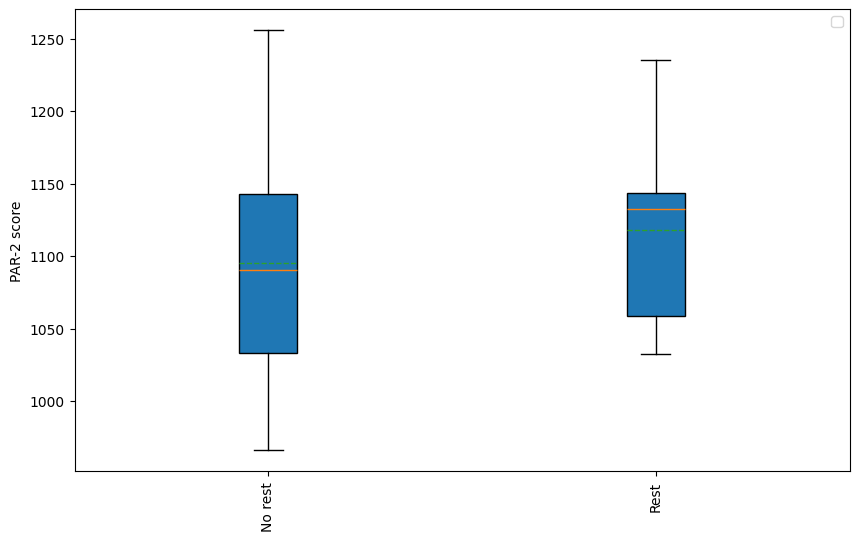

[1094.9111276695462, 1117.6991683090987]

In [10]:
#with open("minhitset/minhitsetcorrected_11means.pkl", 'rb') as f:
#    results.append(pickle.load(f))

#results = [x[:10] for x in results]

results = results[:2]
compareModels(results, ["No rest", "Rest"])#, defvbs=True)

In [ ]:
results_df = pd.DataFrame(results[0])


plt.figure(figsize=(10, 6))
results_df.boxplot(column=['Default', 'Virtual', 'Eval'], showmeans=True, meanline=True)
plt.title('Boxplot of Evaluation Metrics')
plt.ylabel('Values')
plt.xlabel('Metrics')
plt.grid(True)

plt.show()

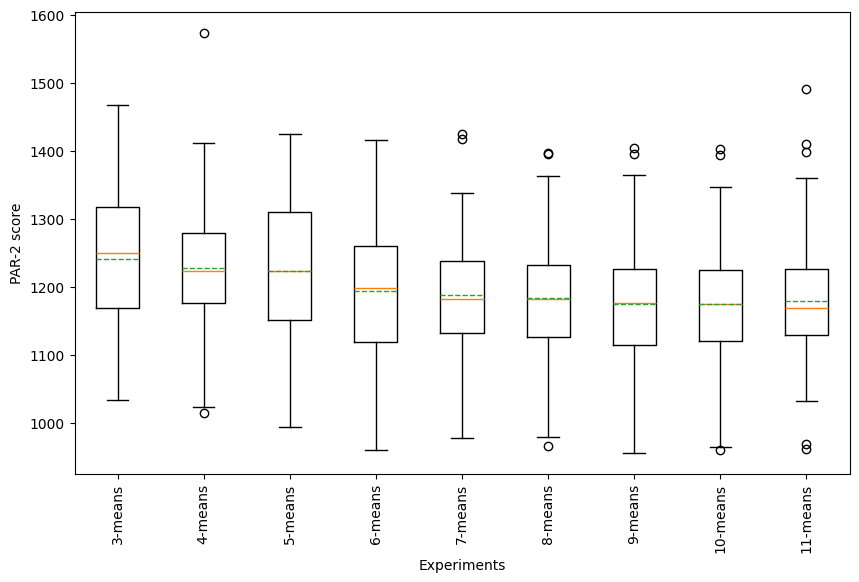

[1240.7909036279666,
 1228.0113379760164,
 1223.955813320687,
 1194.6336907398386,
 1187.8546784085663,
 1183.6762609732777,
 1174.3057571839345,
 1174.9314917331308,
 1179.8841115728492]

In [ ]:
import pickle
from helpers import *

# Plotting the results
results = []

for i in range(3,12):
    with open('minhitset/minhitsetcorrected_{}means.pkl'.format(i), 'rb') as f:
        results.append(pickle.load(f))
    
compareModels(results, ["{}-means".format(i) for i in range(3,12)], title="")

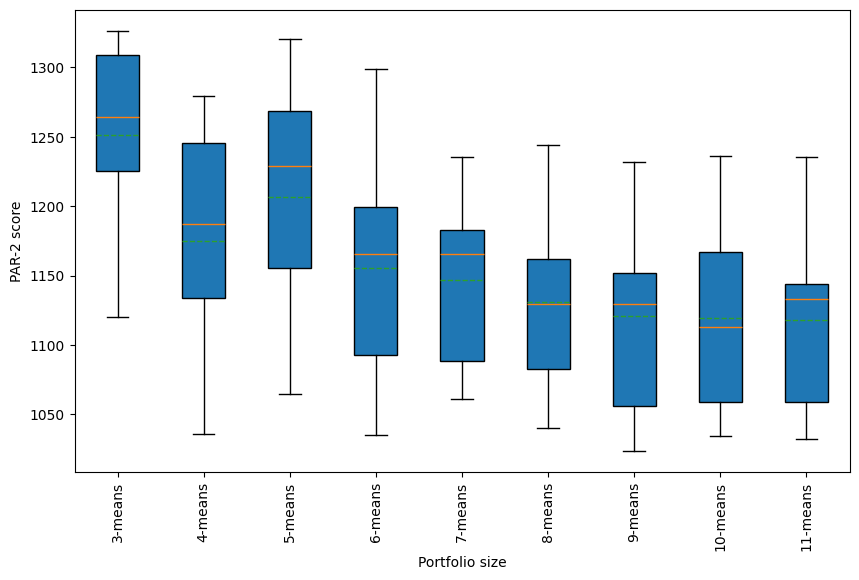

[1251.4583591171001,
 1174.6781698027723,
 1206.7128091382351,
 1155.5424987632978,
 1147.1110343721352,
 1130.7078945599103,
 1120.695545611256,
 1119.6820393024307,
 1117.6991683090987]

In [17]:
import pickle
from helpers import *

# Plotting the results
results = []

for i in range(3,12):
    with open('minhitset/minhitsetcorrected_{}means.pkl'.format(i), 'rb') as f:
        results.append(pickle.load(f))

results = [x[:10] for x in results]
    
compareModels(results, ["{}-means".format(i) for i in range(3,12)], title="")

In [ ]:
from helpers import *

# Function that only returns the hitting set rather than training a classifier
def minhitsetsize(k, seed=0):
    feat = get_available_features()
    data = get_prediction_dataset(feat, "family")

    # Identify families with less than 5 entries
    family_counts = data['family'].value_counts()
    families_to_replace = family_counts[family_counts < 5].index

    # Replace the family label with "rest" for these families
    data['family'] = data['family'].apply(lambda x: 'rest' if x in families_to_replace else x)

    data_train, data_test = train_test_split(data, test_size=0.2, random_state=seed, stratify=data["family"])

    indeces = minhitset(data_train,k, seed=seed)

    return indeces

res = []
for i in range(3,12):
    print(i)
    part = []
    for seed in range(20):
        ind = minhitsetsize(i, seed=seed)
        part.append(ind)
    res.append(part)

3
4
5
6
7
8
9
10
11


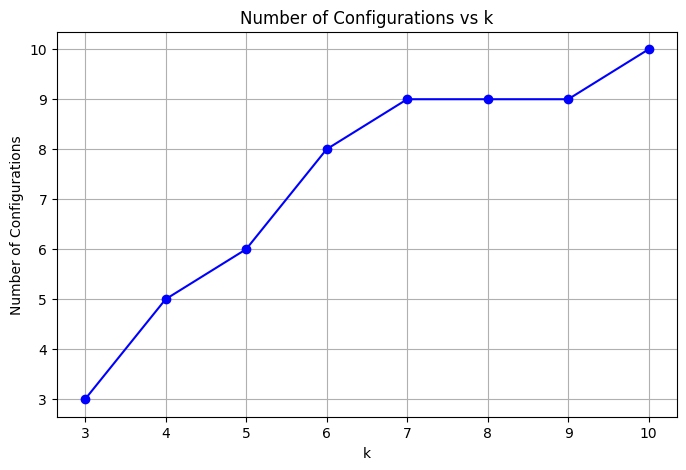

In [ ]:
import matplotlib.pyplot as plt

# Visualize number of configurations by k
num_configurations = [len(configs) for configs in res]
k_values = list(range(3, 11))

plt.figure(figsize=(8, 5))
plt.plot(k_values, num_configurations, marker='o', linestyle='-', color='b')
plt.title('Number of Configurations vs k')
plt.xlabel('k')
plt.ylabel('Number of Configurations')
plt.grid(True)
plt.show()

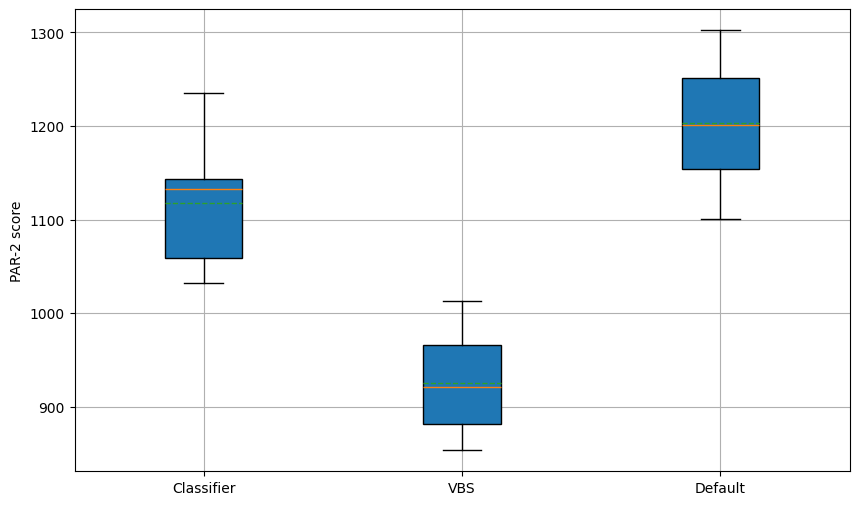

In [13]:
import pickle
from helpers import *

with open('minhitset/minhitsetcorrected_11means.pkl', 'rb') as f:
    results = pickle.load(f)


virtualDefaultEval(results[:10])

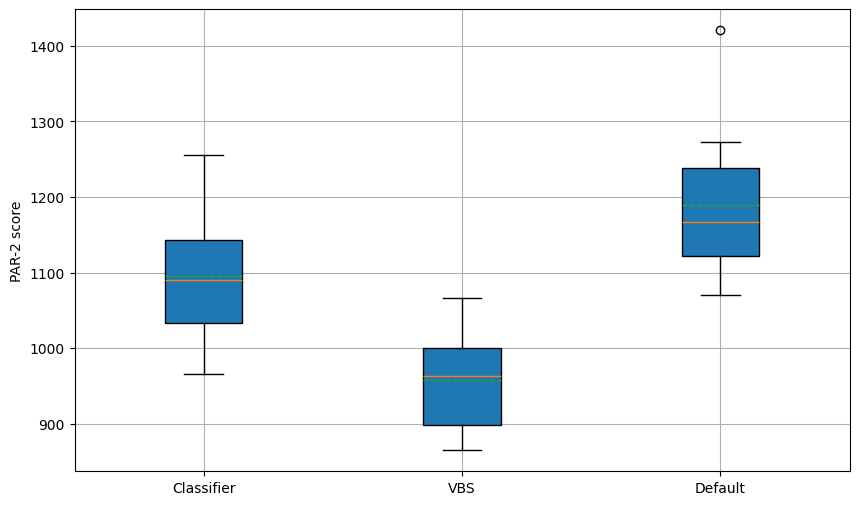

In [14]:
import pickle
from helpers import *

with open('minhitset/minhitsetnorest_11means.pkl', 'rb') as f:
    results = pickle.load(f)


virtualDefaultEval(results[:10])

In [ ]:
import pandas as pd
import pandas as pd
import pickle
from helpers import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

# Returns a Random Forest for the whole dataset
def getModel(k, seed=0):

    df = pd.read_csv('../classifier/top40.csv')
    df = df.groupby('configuration')['time'].sum()
    


    

    feat = get_available_features()
    data = get_prediction_dataset(feat, "family")

    # Identify families with less than 5 entries
    family_counts = data['family'].value_counts()
    families_to_replace = family_counts[family_counts < 5].index

    # Replace the family label with "rest" for these families
    data['family'] = data['family'].apply(lambda x: 'rest' if x in families_to_replace else x)

    indeces = minhitset(data,k, seed=seed)
    configs = df.iloc[indeces].index.tolist()

    df = pd.read_csv('top40.csv')

    family_hashes = {}
    for family in data['family'].unique():
        family_hashes[family] = data[data['family'] == family]['hash'].tolist()


    best_configurations = {}
    for family, hashes in family_hashes.items():

        family_df = df[df['key'].isin(hashes)]
        family_df = family_df[family_df['configuration'].isin(configs)]

        config_runtime_sum = family_df.groupby('configuration')['time'].sum()

        if config_runtime_sum.nunique() == 1:
            best_config = 0
        else:
            best_config = config_runtime_sum.idxmin()

        best_configurations[family] = best_config

    reversed_best_configurations = {}
    for family, config in best_configurations.items():

        if config not in reversed_best_configurations:
            reversed_best_configurations[config] = []

        reversed_best_configurations[config].append(family)

    configs = list(reversed_best_configurations.keys())
    data['index']= "null"
    for config in configs:
        for family in reversed_best_configurations[config]:
            data.loc[data['family'] == family, 'index'] = str(config)

    df = pd.read_csv('../classifier/top40.csv')
    df = df.groupby('configuration')['time'].sum()
    index_counts = data['index'].value_counts()
    default_count = index_counts.get("Default", 0)
    non_default_count = index_counts[index_counts.index != "Default"].sum()

    print(f"Default count: {default_count}")
    print(f"Non-default count: {non_default_count}")

    if non_default_count > default_count:
        print("Non-default configurations have a higher total count than the default configuration.")
    else:
        print("Default configuration has a higher or equal total count compared to non-default configurations.")
    
    # Rename the index field in index_counts to its index in df
    index_mapping = {str(config): df.index.get_loc(config) for config in index_counts.index if config in df.index}
    index_counts.rename(index=index_mapping, inplace=True)
    print(index_counts)


    model = RandomForestClassifier()
    model.fit(data[feat], data['index'])

    return model

model = getModel(9)

# Saves the model
with open('minhitset/modelk9.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

Default count: 292
Non-default count: 467
Non-default configurations have a higher total count than the default configuration.
index
0     292
21    118
6      79
7      59
9      48
29     45
27     41
25     40
16     37
Name: count, dtype: int64


In [16]:
import pickle
with open('minhitset/modelk9.pkl', 'rb') as model_file:
    model = pickle.load(model_file)
    feat = get_available_features()
    data = get_prediction_dataset(feat, "family")
    insts = data["hash"].tolist()
    print(getVirtual(insts, model.classes_))
    print(getDefault(insts))




#df = df.groupby('configuration')['time'].sum()
#
#print(df)

#with open('beamsearch/portfolios.pkl', 'rb') as file:
#    port = pickle.load(f)
#    print(port[0][8][1])

973.3311916355716
1224.408516625956


In [39]:
def locConfig(c):
    df = pd.read_csv('../classifier/top40.csv')
    df = df.groupby('configuration')['time'].sum()

    configs = df.keys().tolist()
    index = configs.index(c)
    return index

def getlist(family : str, hashes : list[str], configs : list[str]):
    res = family + "&"
    for c in configs:
        df = pd.read_csv('../classifier/top40.csv')
        df = df[df["key"].isin(hashes)]
        df = df[df["configuration"] == c]
        df.loc[df['time'] >= 1800, 'time'] = 3600
        total_time = df['time'].sum()
        res += str(int(total_time)) + "&"
        #print(f"Family: {family}, Configuration: {locConfig(c)}, Total Time: {int(total_time)}")
    res = res[:-1]
    res += "\\\\"
    print(res)
        

feat = get_available_features()
data = get_prediction_dataset(feat, "family")

family_counts = data['family'].value_counts()
families_to_replace = family_counts[family_counts < 5].index

    # Replace the family label with "rest" for these families
data['family'] = data['family'].apply(lambda x: 'rest' if x in families_to_replace else x)

#df = pd.read_csv('../classifier/top40.csv')
#df = df[df['configuration'].isin(model.classes_)]


for family in data['family'].unique():
    family_df = data[data['family'] == family]['hash']
    #print(family)
    #print(getBest(family_df.tolist()))
    getlist(family, family_df.tolist(), model.classes_)





rest&129793&212191&157846&163575&254693&166634&148794&155540&147593\\
hardware-verification&12149&36000&9465&9090&32417&24928&11984&15747&29662\\
social-golfer&55921&69547&70054&69482&65076&52350&65887&69996&59273\\
cryptography-simon&61200&61200&61200&97200&61294&61200&61200&97200&69560\\
miter&52021&104827&70609&80446&140638&93258&65041&102864&127859\\
cryptography&11024&22114&34186&37669&30367&12758&30415&34463&17942\\
planning&9619&20295&9253&6559&25203&16179&5928&6687&18054\\
subgraph-isomorphism&8338&8052&8127&8004&14400&10804&5607&5158&8546\\
hamiltonian&4900&17355&48277&32381&144000&4369&43447&57360&21394\\
reg-n&18011&32400&18010&18011&32400&18010&32400&32400&32400\\
software-verification&2648&10927&5861&15239&54000&8344&2930&5227&14371\\
pigeon-hole&15904&18208&15274&16472&18178&15595&18405&18442&18895\\
minimum-disagreement-parity&44634&43652&47044&45720&54764&43505&39986&43909&49206\\
heule-nol&3822&39600&39600&39600&34029&2749&39600&39600&27320\\
argumentation&41209&30757&

In [37]:
header = "Family &"
for c in model.classes_:
    index = locConfig(c)
    header += str(index) + "&"
header = header[:-1]
header += "\\\\"
print(header)

Family &0&6&7&9&16&21&25&27&29\\


In [12]:
from helpers import *
import pickle
with open('minhitset/modelk9.pkl', 'rb') as model_file:
    model = pickle.load(model_file)
    feat = get_available_features()
    data = get_prediction_dataset(feat, "family")
    insts = data["hash"].tolist()
    #print(getVirtual(insts, model.classes_))
    #print(getDefault(insts))


def getlist(family : str, hashes : list[str], configs : list[str]):
    res = {}
    for c in configs:
        df = pd.read_csv('../classifier/top40.csv')
        df = df[df["key"].isin(hashes)]
        df = df[df["configuration"] == c]
        df.loc[df['time'] >= 1800, 'time'] = 3600
        total_time = df['time'].sum()
        res[locConfig(c)] = total_time

    return res

feat = get_available_features()
data = get_prediction_dataset(feat, "family")

family_counts = data['family'].value_counts()
families_to_replace = family_counts[family_counts < 5].index

    # Replace the family label with "rest" for these families
data['family'] = data['family'].apply(lambda x: 'rest' if x in families_to_replace else x)

#df = pd.read_csv('../classifier/top40.csv')
#df = df[df['configuration'].isin(model.classes_)]

confscores = []
for family in data['family'].unique():
    print(family)
    family_df = data[data['family'] == family]['hash']
    #print(family)
    #print(getBest(family_df.tolist()))
    confscores.append(getlist(family, family_df.tolist(), model.classes_))
print(confscores)

rest
hardware-verification
social-golfer
cryptography-simon
miter
cryptography
planning
subgraph-isomorphism
hamiltonian
reg-n
software-verification
pigeon-hole
minimum-disagreement-parity
heule-nol
argumentation
grs-fp-comm
cryptography-ascon
tseitin-formulas
scheduling
hashtable-safety
profitable-robust-production
school-timetabling
bitvector
maxsat-optimum
or_randxor
subsumptiontest
satcoin
mutilated-chessboard
relativized-pigeon-hole
register-allocation
heule-folkman
rbsat
random-circuits
interval-matching
brent-equations
coloring
set-covering
cril-misc
independent-set
quantum-kochen-specker
[{0: 129793.7417690754, 6: 212191.4970676899, 7: 157846.95348381996, 9: 163575.32210206985, 16: 254693.3207836151, 21: 166634.8405456543, 25: 148794.29796981812, 27: 155540.9457669258, 29: 147593.36935806274}, {0: 12149.813713550568, 6: 36000.0, 7: 9465.877073764801, 9: 9090.68748140335, 16: 32417.380609750748, 21: 24928.976343154907, 25: 11984.954810380936, 27: 15747.222067832947, 29: 29662.33

In [11]:
def compareLabelPerf(scores, c1, c2):
    sum = 0
    for s in scores:
        sum += abs(s[c1] - s[c2])
    return sum

configIndeces = [locConfig(c) for c in model.classes_]

#for i in range
print(configIndeces)

matr = [[0 for _ in range(len(configIndeces))] for _ in range(len(configIndeces))]

for i in range(len(configIndeces)):
    for j in range(i + 1, len(configIndeces)):       
        diff = compareLabelPerf(confscores, configIndeces[i], configIndeces[j])
        matr[i][j] = diff
        matr[j][i] = diff

for row in matr:
    print(row)

highest_values = [max(row) for row in matr]
print(highest_values)

[0, 6, 7, 9, 16, 21, 25, 27, 29]
[0, 781338, 500538, 525801, 1207582, 223042, 484071, 821940, 508657]
[781338, 0, 526504, 483459, 810890, 594838, 446241, 510998, 612679]
[500538, 526504, 0, 179163, 1099938, 551330, 315949, 380654, 720569]
[525801, 483459, 179163, 0, 1123753, 507075, 328400, 373207, 693238]
[1207582, 810890, 1099938, 1123753, 0, 1008624, 1016017, 1020774, 867995]
[223042, 594838, 551330, 507075, 1008624, 0, 511697, 778654, 396917]
[484071, 446241, 315949, 328400, 1016017, 511697, 0, 368575, 508452]
[821940, 510998, 380654, 373207, 1020774, 778654, 368575, 0, 557841]
[508657, 612679, 720569, 693238, 867995, 396917, 508452, 557841, 0]
[1207582, 810890, 1099938, 1123753, 1207582, 1008624, 1016017, 1020774, 867995]


In [21]:
allargs = []

for c in model.classes_:
    if c == "Default":
        continue
    c = c[1:-1]
    c = c.split(", ")
    args = {}
    for arg in c:
        name, val = arg.split(": ")
        args[name[1:-1]] = val
    allargs.append(args)
        

header = "Configuration & 6 & 7 & 9 & 16 & 21 & 25 & 27 & 29 \\\\"

for k in allargs[0].keys():
    line = k + "&"
    for i in range(8):
        line += allargs[i][k] + "&"
    line = line[:-1]
    line += "\\\\"
    print(line)


backbone&0&0&0&2&2&2&2&2\\
bump&1&1&1&0&1&1&1&1\\
chrono&0&1&1&0&0&0&1&1\\
congruence&0&0&1&1&0&1&0&0\\
eliminate&1&0&1&0&1&1&0&0\\
extract&1&0&0&1&1&0&0&0\\
factor&1&1&1&1&1&0&0&1\\
fastel&0&1&0&0&0&1&1&1\\
forward&0&1&1&0&0&0&0&0\\
lucky&1&1&0&0&1&1&0&0\\
phase&1&1&1&0&0&0&1&1\\
phasesaving&0&1&1&1&1&1&1&0\\
preprocess&1&1&0&0&1&0&1&1\\
probe&0&1&1&0&1&1&1&0\\
randec&0&0&1&1&1&0&0&0\\
reluctant&0&0&1&1&0&0&0&1\\
reorder&2&2&0&2&2&2&0&0\\
rephase&0&0&0&1&1&1&0&1\\
restart&0&1&1&1&0&1&1&1\\
stable&2&0&0&2&2&0&0&1\\
substitute&0&1&0&1&0&1&0&1\\
sweep&0&1&1&0&1&1&0&1\\
target&1&0&0&1&2&0&0&2\\
transitive&1&0&0&1&0&1&1&1\\
vivify&1&1&1&0&1&1&1&1\\
warmup&1&0&1&0&0&1&0&1\\


In [22]:
print(model.classes_)

['Default'
 "{'backbone': 0, 'bump': 1, 'chrono': 0, 'congruence': 0, 'eliminate': 1, 'extract': 1, 'factor': 1, 'fastel': 0, 'forward': 0, 'lucky': 1, 'phase': 1, 'phasesaving': 0, 'preprocess': 1, 'probe': 0, 'randec': 0, 'reluctant': 0, 'reorder': 2, 'rephase': 0, 'restart': 0, 'stable': 2, 'substitute': 0, 'sweep': 0, 'target': 1, 'transitive': 1, 'vivify': 1, 'warmup': 1}"
 "{'backbone': 0, 'bump': 1, 'chrono': 1, 'congruence': 0, 'eliminate': 0, 'extract': 0, 'factor': 1, 'fastel': 1, 'forward': 1, 'lucky': 1, 'phase': 1, 'phasesaving': 1, 'preprocess': 1, 'probe': 1, 'randec': 0, 'reluctant': 0, 'reorder': 2, 'rephase': 0, 'restart': 1, 'stable': 0, 'substitute': 1, 'sweep': 1, 'target': 0, 'transitive': 0, 'vivify': 1, 'warmup': 0}"
 "{'backbone': 0, 'bump': 1, 'chrono': 1, 'congruence': 1, 'eliminate': 1, 'extract': 0, 'factor': 1, 'fastel': 0, 'forward': 1, 'lucky': 0, 'phase': 1, 'phasesaving': 1, 'preprocess': 0, 'probe': 1, 'randec': 1, 'reluctant': 1, 'reorder': 0, 'repha

In [13]:

def printBest(family, scores, count):
    minimum = min(scores.values())
    res = family + "&" + str(count) + "&"
    for s in scores.values():
        if s == minimum:
            res += "\\textbf{" + str(int(s / count)) +"}&"
        else:
            res += str(int(s / count)) + "&"
    res = res[:-1]
    res += "\\\\"
    print(res)
   

for i, family in enumerate(data['family'].unique().tolist()): 
    num_instances = len(data[data['family'] == family])
    printBest(family, confscores[i], num_instances)


rest&86&\textbf{1509}&2467&1835&1902&2961&1937&1730&1808&1716\\
hardware-verification&10&1214&3600&946&\textbf{909}&3241&2492&1198&1574&2966\\
social-golfer&20&2796&3477&3502&3474&3253&\textbf{2617}&3294&3499&2963\\
cryptography-simon&27&2266&2266&\textbf{2266}&3600&2270&2266&2266&3600&2576\\
miter&56&\textbf{928}&1871&1260&1436&2511&1665&1161&1836&2283\\
cryptography&15&\textbf{734}&1474&2279&2511&2024&850&2027&2297&1196\\
planning&8&1202&2536&1156&819&3150&2022&\textbf{741}&835&2256\\
subgraph-isomorphism&6&1389&1342&1354&1334&2400&1800&934&\textbf{859}&1424\\
hamiltonian&40&122&433&1206&809&3600&\textbf{109}&1086&1434&534\\
reg-n&9&2001&3600&2001&2001&3600&\textbf{2001}&3600&3600&3600\\
software-verification&15&\textbf{176}&728&390&1015&3600&556&195&348&958\\
pigeon-hole&7&2272&2601&\textbf{2182}&2353&2596&2227&2629&2634&2699\\
minimum-disagreement-parity&17&2625&2567&2767&2689&3221&2559&\textbf{2352}&2582&2894\\
heule-nol&11&347&3600&3600&3600&3093&\textbf{249}&3600&3600&2483\\
arg

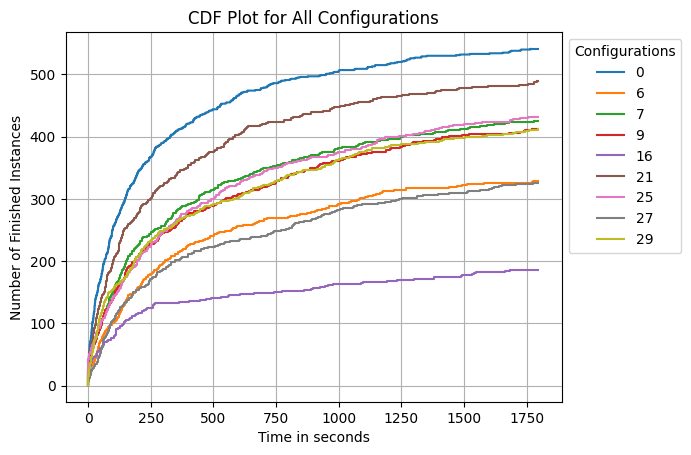

In [44]:
import numpy as np

df = pd.read_csv('./top40.csv')
df = df[df['configuration'].isin(model.classes_)]
for conf in model.classes_:
    config_times = df[df['configuration'] == conf]['time']
    config_times = config_times[config_times <= 1800]  # Filter out times greater than 1800
    sorted_times = np.sort(config_times)
    cdf = np.arange(1, len(sorted_times) + 1)  # Count the total number of finished instances
    plt.step(sorted_times, cdf, where='post', label=locConfig(conf))
    if len(sorted_times) > 0 and sorted_times[-1] < 1800:
        plt.hlines(cdf[-1], sorted_times[-1], 1800, colors=plt.gca().lines[-1].get_color())
plt.legend(title="Configurations", loc='upper left', bbox_to_anchor=(1, 1))
plt.title("CDF Plot for All Configurations")
plt.xlabel("Time in seconds")
plt.ylabel("Number of Finished Instances")
plt.grid(True)
plt.show()

In [16]:
feat = get_available_features()
data = get_prediction_dataset(feat, "family")

data = data[data["family"] == "cryptography-simon"]
hashes = data['hash'].tolist()

df = pd.read_csv('./top40.csv')
df = df[df["key"].isin(hashes)]

df.loc[df['time'] > 1800, 'time'] = 3600

df['time'] = df['time'].astype(int)

grouped = df.groupby('configuration')['time'].sum()
grouped = grouped.sort_values()
print(grouped)

configuration
Default                                                                                                                                                                                                                                                                                                                                                                           61200
{'backbone': 2, 'bump': 1, 'chrono': 1, 'congruence': 0, 'eliminate': 1, 'extract': 1, 'factor': 1, 'fastel': 0, 'forward': 1, 'lucky': 1, 'phase': 0, 'phasesaving': 0, 'preprocess': 1, 'probe': 1, 'randec': 0, 'reluctant': 1, 'reorder': 0, 'rephase': 0, 'restart': 1, 'stable': 0, 'substitute': 1, 'sweep': 1, 'target': 1, 'transitive': 1, 'vivify': 1, 'warmup': 0}    61200
{'backbone': 2, 'bump': 1, 'chrono': 1, 'congruence': 0, 'eliminate': 1, 'extract': 1, 'factor': 0, 'fastel': 1, 'forward': 0, 'lucky': 1, 'phase': 1, 'phasesaving': 1, 'preprocess': 1, 'probe': 1, 'randec': 1, 'reluctant': 1, 'reorde